<a href="https://colab.research.google.com/github/Antolee2/finance-data-analysis-mini/blob/main/Finance_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Finance EDA Project
# Exploratory Data Analysis on Financial Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
print("Starting Finance EDA Project...")
print("=" * 50)

Libraries imported successfully!
Starting Finance EDA Project...


In [2]:
# Import necessary libraries for financial data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
print("All libraries imported successfully!")
print("Ready to start Finance EDA Project...")
print("=" * 50)

All libraries imported successfully!
Ready to start Finance EDA Project...


In [3]:
# Step 1: Download Financial Data
# We'll use yfinance to get stock data for major companies and market indices

# Define the stocks and indices we want to analyze
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'BAC', 'V', 'MA']
indices = ['^GSPC', '^DJI', '^IXIC']  # S&P 500, Dow Jones, NASDAQ

# Set date range for analysis (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

print(f"Downloading data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print("Stocks:", ', '.join(stocks))
print("Indices:", ', '.join(indices))
print("\nDownloading data...")

# Download stock data
stock_data = yf.download(stocks, start=start_date, end=end_date, progress=False)
index_data = yf.download(indices, start=start_date, end=end_date, progress=False)

print(f"Stock data shape: {stock_data.shape}")
print(f"Index data shape: {index_data.shape}")
print("Data download completed successfully!")

Stocks: AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, JPM, BAC, V, MA
Indices: ^GSPC, ^DJI, ^IXIC

Stock data shape: (501, 50)
Index data shape: (501, 15)
Data download completed successfully!


In [4]:
# Step 2: Data Exploration and Initial Analysis

# Let's examine the structure of our data
print("=== STOCK DATA OVERVIEW ===")
print(f"Stock data columns: {list(stock_data.columns.levels[0])}")
print(f"Stock price types: {list(stock_data.columns.levels[1])}")
print(f"Date range: {stock_data.index.min()} to {stock_data.index.max()}")
print(f"Number of trading days: {len(stock_data)}")

print("\n=== INDEX DATA OVERVIEW ===")
print(f"Index data columns: {list(index_data.columns.levels[0])}")
print(f"Index price types: {list(index_data.columns.levels[1])}")

# Display first few rows of stock data
print("\n=== FIRST 5 ROWS - STOCK DATA (Close Prices) ===")
stock_close = stock_data['Close']
print(stock_close.head())

# Display basic statistics
print("\n=== BASIC STATISTICS - STOCK CLOSE PRICES ===")
print(stock_close.describe())

=== STOCK DATA OVERVIEW ===
Stock data columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Stock price types: ['AAPL', 'AMZN', 'BAC', 'GOOGL', 'JPM', 'MA', 'MSFT', 'NVDA', 'TSLA', 'V']
Date range: 2023-10-23 00:00:00 to 2025-10-21 00:00:00
Number of trading days: 501

=== INDEX DATA OVERVIEW ===
Index data columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Index price types: ['^DJI', '^GSPC', '^IXIC']

=== FIRST 5 ROWS - STOCK DATA (Close Prices) ===
Ticker            AAPL        AMZN        BAC       GOOGL         JPM  \
Date                                                                    
2023-10-23  171.321915  126.559998  24.303679  135.564987  134.856766   
2023-10-24  171.757645  128.559998  24.208630  137.859177  135.019333   
2023-10-25  169.440353  121.389999  24.284670  124.749596  134.282883   
2023-10-26  165.271179  119.570000  24.826443  121.442398  134.627228   
2023-10-27  166.588287  127.739998  23.923485  121.333153  129.778107   

Ticker              MA        MS

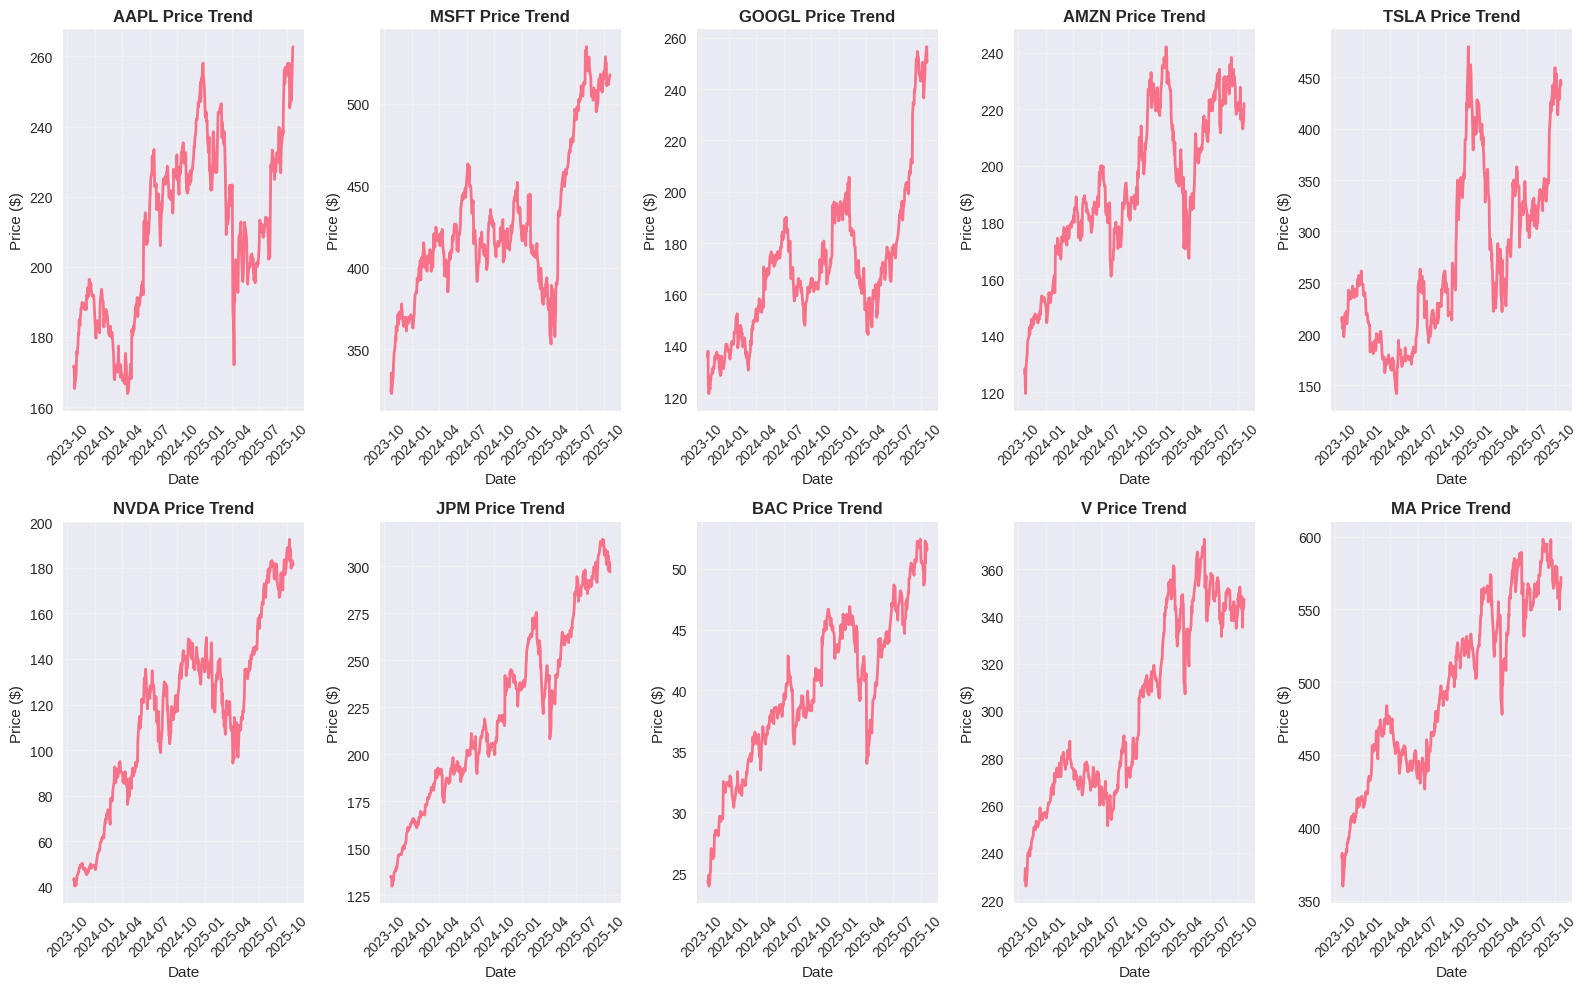

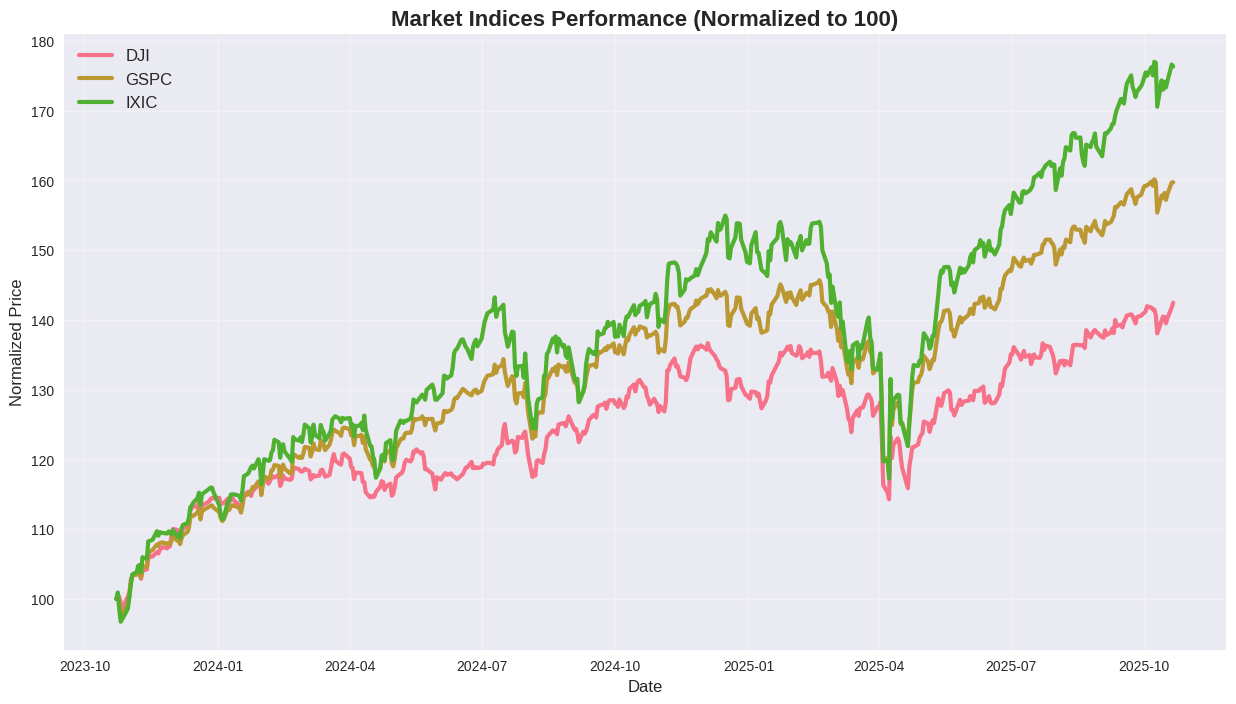

In [5]:
# Step 3: Data Visualization and Analysis

# 1. Stock Price Trends
plt.figure(figsize=(16, 10))
for i, stock in enumerate(stocks):
    plt.subplot(2, 5, i+1)
    plt.plot(stock_data.index, stock_data['Close'][stock], linewidth=2)
    plt.title(f'{stock} Price Trend', fontsize=12, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Market Indices Comparison
plt.figure(figsize=(15, 8))
index_close = index_data['Close']
for idx in index_close.columns:
    normalized_prices = (index_close[idx] / index_close[idx].iloc[0]) * 100
    plt.plot(index_close.index, normalized_prices, linewidth=3, label=idx.replace('^', ''))

plt.title('Market Indices Performance (Normalized to 100)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()